# Clustering
Unsupervised machine learning. Discrete classification. 

Links
* [Tutorial](https://matteucci.faculty.polimi.it/Clustering/tutorial_html/index.html) from Italy
* [sklearn](https://scikit-learn.org/stable/modules/clustering.html) index of all algorithms
* [sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) comparison on toy datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
#np.random.seed(0)

In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [3]:
COLORS = np.array([
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00"
])

## Hierarchical clustering: Agglomerative clustering.
Bottom-up. Scales well. Works with any distance, even non-Euclidean. Can choose #clusters interactively.  

Clustering metrics: single-linkage clustering (min), complete-linkage clustering (max), average-linkage clustering. Ward uses centroids and SSE; it is similar to ANOVA and to the K-means objective function in that it minimizes intra vs inter group variance.

See: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) AgglomerativeClustering. Can set goal by #clusters or distance threshold. Attributes include #clusters, #leaves, #features used, and #connected components.    
See also: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration) FeatureAgglomeration can cluster features for dimensionality reduction.

In [4]:
def make_clusters(XY, num_clusters=None):
    X = XY[0]
    Y = XY[1]
    alg = cluster.AgglomerativeClustering()
    if num_clusters is not None:
        alg = cluster.AgglomerativeClustering(num_clusters)  
        ## with no setting, it converges on 2
    alg.fit(X)
    ypred = alg.labels_
    print('#clusters',alg.n_clusters_,'cluster assignments per point',alg.labels_)
    plt.scatter(X[:, 0], X[:, 1], color=COLORS[ypred])
    plt.show()

#clusters 2 cluster assignments per point [1 1 1 0 0 0]


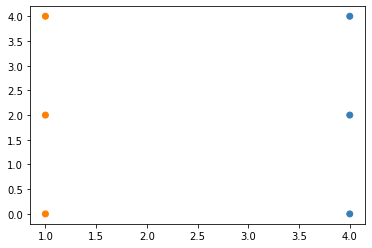

In [5]:
# Simple example from docs with 2 clusters obviously.
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
Y = [0,0,0,1,1,1]
make_clusters( (X,Y) )

#clusters 2 cluster assignments per point [0 0 0 ... 0 0 1]


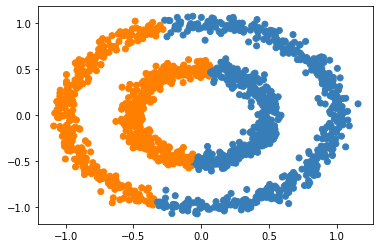

In [6]:
make_clusters(noisy_circles)

#clusters 3 cluster assignments per point [2 2 2 ... 2 1 1]


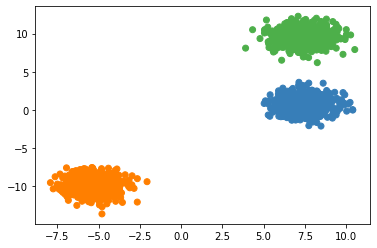

In [7]:
make_clusters(blobs,3)  # better than 2

#clusters 5 cluster assignments per point [3 1 0 ... 4 1 4]


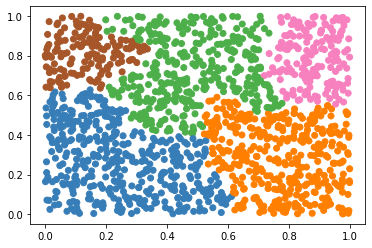

In [8]:
make_clusters(no_structure,5)

## Partition clustering: K-Means Clustering  
K-means finds a local optimum. 
If it merges two real clusters, finding the optimum becomes hopeless. 
That's why it is recommended to try several reruns with different random initializers.

See [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans) Kmeans.
The sklearn initializer can be 'random', 'kmeans++', or an array.
Random is fastest but worst performer.

Kmeans++ chooses random points that are not close to each other
and are reflective of the data distributon.
Kmeans++ has guarrantee of coming within log() of the optimum.
See [kmeans++](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf) from Stanford.


In [9]:
def make_clusters(XY, num_clusters=None):
    X = XY[0]
    Y = XY[1]
    alg = cluster.KMeans()  # default = 8
    if num_clusters is not None:
        alg = cluster.KMeans(num_clusters)  
    alg.fit(X)
    ypred = alg.labels_
    print('iterations',alg.n_iter_,',cluster centers:\n',alg.cluster_centers_)
    print('cluster assignments per point',alg.labels_)
    print('SSE (optionally weighted)',alg.inertia_)
    plt.scatter(X[:, 0], X[:, 1], color=COLORS[ypred])
    plt.show()

iterations 12 ,cluster centers:
 [[0.56509065 0.51509092]
 [0.22472802 0.25115817]
 [0.22267862 0.77777094]
 [0.77864521 0.20105531]
 [0.80523287 0.7889134 ]]
cluster assignments per point [4 0 1 ... 2 3 2]
SSE (optionally weighted) 53.28031000651146


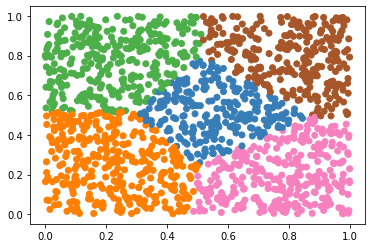

In [10]:
make_clusters(no_structure,5)

iterations 34 ,cluster centers:
 [[0.28869144 0.160752  ]
 [0.57716513 0.51014109]
 [0.27033316 0.84836707]
 [0.81773298 0.78267988]
 [0.15501128 0.50632027]
 [0.8026796  0.20634865]]
cluster assignments per point [3 1 0 ... 2 5 4]
SSE (optionally weighted) 43.83351532661702


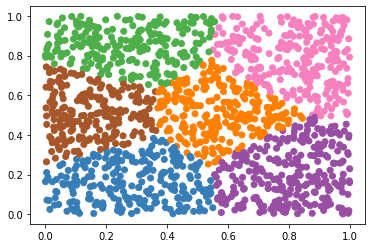

In [11]:
make_clusters(no_structure,6)

### Bisecting Kmeans

This algorithm starts with one cluster then iteratively cut one in 2 (or n). 
There are various strategies for choosing the next cluster to split.

Coming soon: [sklearn](https://scikit-learn.org/dev/modules/generated/sklearn.cluster.BisectingKMeans.html) cluster.BisectingKmeans. 
For now, you must install developer pre-release, ver 1.1. 
This class has the same fields and methods as Kmeans. 
Set the strategy to bisect the cluster with max #points or max inertia=SSE. 
This class never generates empty clusters. 
See [sklearn](https://scikit-learn.org/dev/auto_examples/cluster/plot_bisect_kmeans.html) to compare Kmeans with Bisecting Kmeans.

Bisecting vs regular Kmeans  
Pros  
* Less computation since it works on fewer points per iteration. More efficient for large datasets.  
* Clusters more likely correspond to true hierachy. Fewer unrelated clusters. 
* Better results compared to Kmeans(initializer=random). 

Cons
* Won't work for generating 2 clusters.  
* Worse results compared to Kmeans(initializer=k-means++).  


## Homegrown K-means

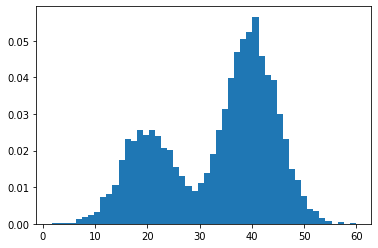

In [12]:
# Straight from the Mastery site.
# Construct a bimodal from two Gaussian processes.
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot
# normal ( mean, standard deviation, count )
def plot(X1,X2):
    X = hstack( (X1, X2) )  # horizontal stack i.e. concat
    pyplot.hist(X, bins=50, density=True)
    pyplot.show()
X1 = normal(loc=20, scale=5, size=3000) 
X2 = normal(loc=40, scale=5, size=6000)
plot(X1,X2)

In [25]:
# Choose fair not-quite-random initializers, k=2.
mean1 = 29
mean2 = 31

In [26]:
def is_closer(point,this_mean,that_mean):
    return abs(point-this_mean) < abs(point-that_mean)
def recompute_means(mean1,mean2,data):
    data1=[x for x in data if is_closer(x,mean1,mean2)]
    data2=[x for x in data if is_closer(x,mean2,mean1)]
    mean1=np.mean(data1)
    mean2=np.mean(data2)
    return mean1,mean2
def iterate(mean1,mean2,data,epsilon):
    prev1=mean1
    prev2=mean2
    delta=epsilon+1
    while delta>epsilon:
        print(mean1,mean2)
        mean1,mean2=recompute_means(mean1,mean2,data)
        delta=max(abs(mean1-prev1),abs(mean2-prev2))
        prev1=mean1
        prev2=mean2
    return mean1,mean2

In [27]:
X = hstack( (X1, X2) ) 
X = X.reshape((len(X), 1))
new1,new2=iterate(mean1,mean2,X,0.01)
print(new1,new2)

29 31
20.128776107999453 40.16523731227556
20.16450532287914 40.18392730521316
20.167766086289692 40.185616732924146
